<a href="https://colab.research.google.com/github/piyu18/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import car dataset 
df = pd.read_csv('car.data',header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Exploratory Data Analysis(EDA)
##### Explore the dataset to gain more insights

In [3]:
df.shape

(1728, 7)

As we can see that there is no header in the dataset,it's taking the default indexes, we can add column names as given in dataset description


In [4]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Get the data types of each columns
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


From the info we can see that there is no null values present inside the dataset

#### Frequency distribution of values for each features

In [7]:
for col in names:
  print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64




*   From the above distribution we can see that each feature is of categorical type
*   class is a target column



#### Declaration of feature vector and target variable

In [8]:
X = df.drop(columns='class')
Y = df['class']

#### Split data into training and test dataset

In [9]:
# split X and y into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 21)

In [10]:
# shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [11]:
! pip install --upgrade category_encoders
from category_encoders.ordinal import OrdinalEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
encoder = OrdinalEncoder(cols=names[0:6])

In [13]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [14]:
X_train[:5]

,buying,maint,doors,persons,lug_boot,safety
1399,1,1,1,1,1,1
1090,2,2,2,2,2,1
406,3,3,1,3,2,1
541,4,4,2,3,2,1
72,3,1,3,1,2,2


In [15]:
X_test[:5]

,buying,maint,doors,persons,lug_boot,safety
1066,2,4,1,2,1,1
1172,2,2,1,2,2,3
213,3,4,1,1,3,2
23,3,1,2,1,1,3
826,4,3,3,2,3,1


#### Decision Tree classifier with criterion entropy

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=5)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [30]:
from sklearn.metrics import accuracy_score
y_pred_en=clf.predict(X_test)
accuracy_score(y_test, y_pred_en)

0.8554913294797688

In [31]:
y_pred_train_en = clf.predict(X_train)
accuracy_score(y_train,y_pred_train_en)

0.869753979739508

#### Check for overfitting and underfitting

In [28]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8698
Test set score: 0.8555


We can see that our training set and test set score is same as above, so there is no sign of overfitting or underfitting. Based on the above analysis we can conclude that our model accuracy is quite good.

####Visualization of final decision tree

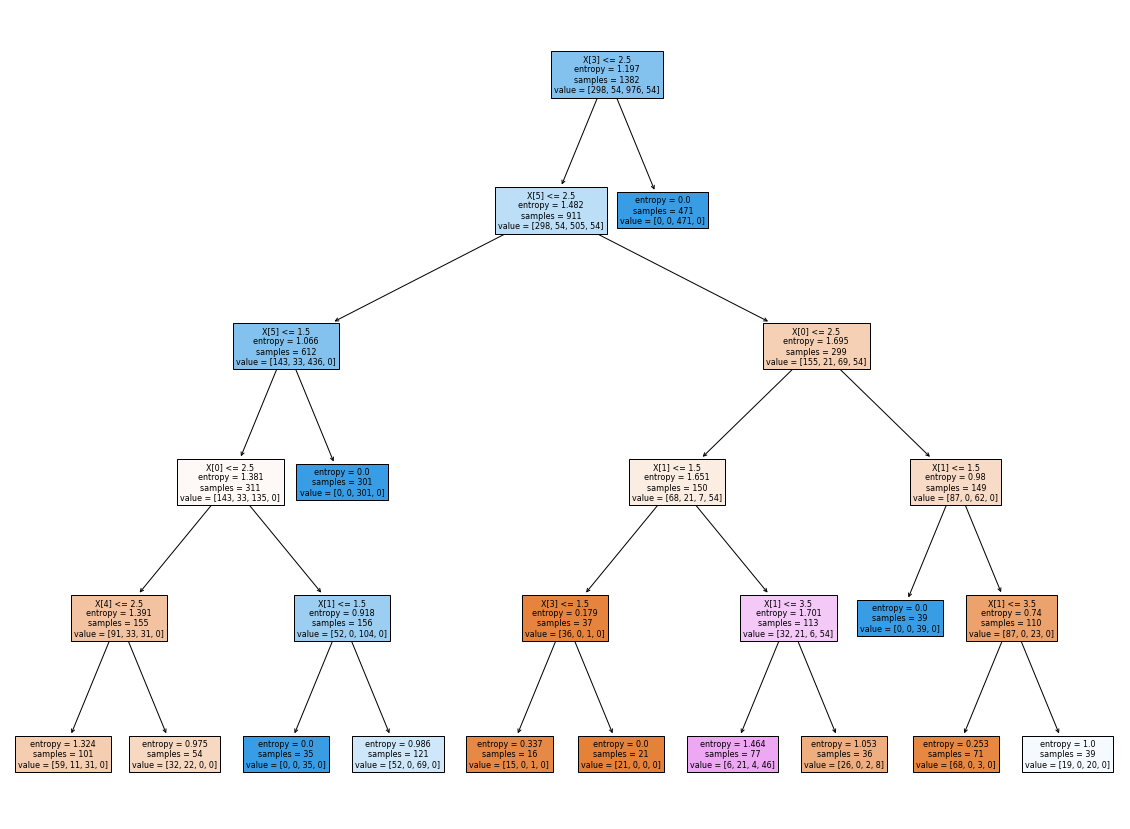

In [25]:

from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(clf,filled=True)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_en))


              precision    recall  f1-score   support

         acc       0.76      0.76      0.76        86
        good       0.00      0.00      0.00        15
       unacc       0.93      0.96      0.95       234
       vgood       0.32      0.55      0.40        11

    accuracy                           0.86       346
   macro avg       0.50      0.57      0.53       346
weighted avg       0.83      0.86      0.84       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_en))

[[ 65   0  17   4]
 [  6   0   0   9]
 [  9   0 225   0]
 [  5   0   0   6]]


#### Decision Tree Algorithm with criterion gini index

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf_gi = DecisionTreeClassifier( random_state=0,max_depth=5)# default criterion is gini

clf_gi.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [36]:
from sklearn.metrics import accuracy_score
y_pred_gi=clf_gi.predict(X_test)
accuracy_score(y_test, y_pred_gi)

0.8670520231213873

In [37]:
y_pred_train_gi = clf_gi.predict(X_train)
accuracy_score(y_train,y_pred_train_gi)

0.8784370477568741

#### Check for overfitting and underfitting

In [38]:
print('Training set score: {:.4f}'.format(clf_gi.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gi.score(X_test, y_test)))

Training set score: 0.8784
Test set score: 0.8671


We can see that our training set and test set score is same as above, so there is no sign of overfitting or underfitting. Based on the above analysis we can conclude that our model accuracy is quite good.

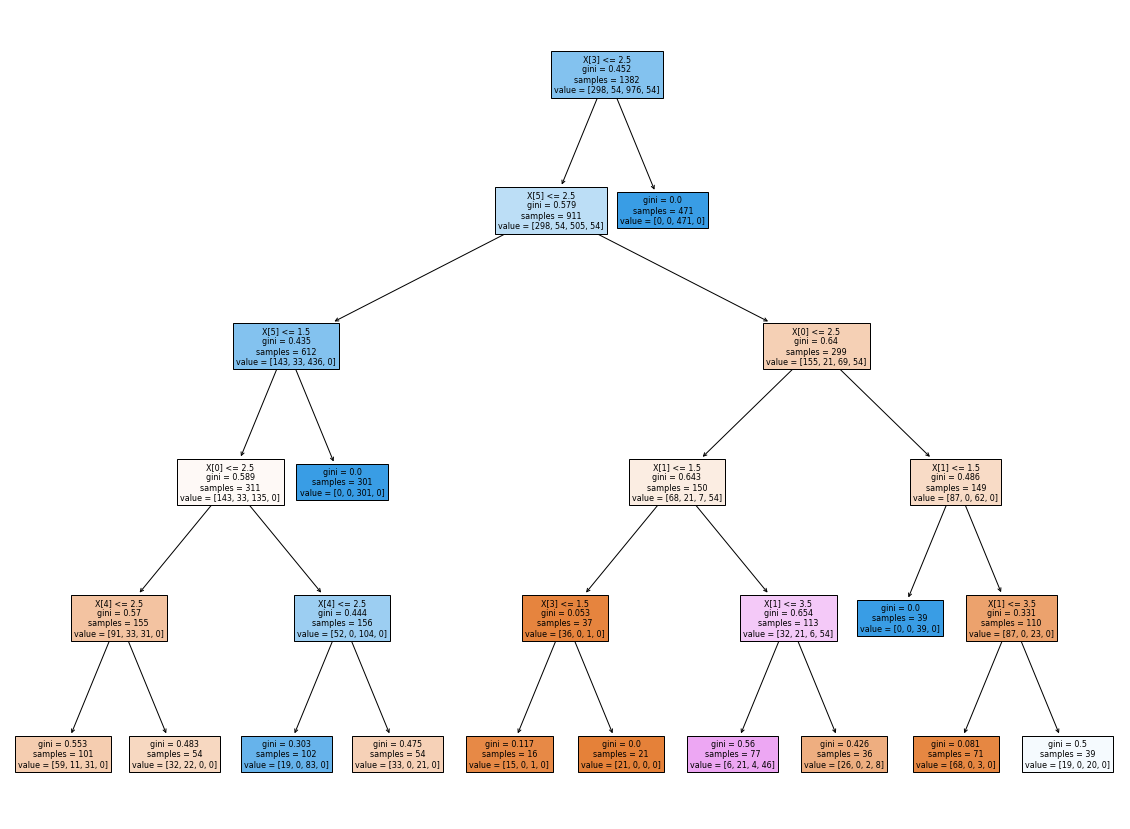

In [40]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(clf_gi,filled=True)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gi))
print(confusion_matrix(y_test, y_pred_gi))


              precision    recall  f1-score   support

         acc       0.76      0.84      0.80        86
        good       0.00      0.00      0.00        15
       unacc       0.96      0.95      0.95       234
       vgood       0.32      0.55      0.40        11

    accuracy                           0.87       346
   macro avg       0.51      0.58      0.54       346
weighted avg       0.85      0.87      0.85       346

[[ 72   0  10   4]
 [  6   0   0   9]
 [ 12   0 222   0]
 [  5   0   0   6]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Conclusion


*   In this we have trained model by using both entropy and gini
*   Both the models don't show any sign of overfitting or underfitting


*   Model with gini criterion has accuracy of approx 87% while model with entropy criterion has accuracy of approx 86%
*   From the above we can conclude that model with gini criterion performs better than entropy criterion



